In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

TIME_TICKS = [0, 30, 60, 90, 120, 150, 180]
TRAIN_TICKS = [0,1,2,3]
VEL_TICKS = [0,10,20,30,40,50]
TORQUE_TICKS = [0,0.2,0.4,0.6]

TRAIN_LIM = [0.5,3.5]
VEL_LIM = [-5, 55]
TORQUE_LIM = [-0.1, 0.6]

def get_df(drive, data_path=Path("data"), max_time=180):
    pos = pd.read_csv(data_path / (drive+"_master.csv"), skiprows=14, header=None, sep=';')
    time = pos[pos.columns[1]]
    time = (time-time.iloc[0])/ time.iloc[-1] * max_time
    pos = pos[pos.columns[-1]]
    vel = pd.read_csv(data_path / (drive+"_vel.csv"), skiprows=14, header=None, sep=';')
    vel = vel[vel.columns[-1]]
    tor = pd.read_csv(data_path / (drive+"_tor.csv"), skiprows=14, header=None, sep=';')
    tor = tor[tor.columns[-1]]

    df = pd.DataFrame({"time": time, "pos": pos, "vel": vel, "tor": tor})
    return df

def plot_data(df, drive, ):
    plt.subplots(3,1,figsize=(10,10))
    
    plt.subplot(3,1,1)
    plt.plot(df.time, df.pos)
    plt.ylabel("train number")
    plt.xlabel("time")
    plt.xticks(TIME_TICKS)
    plt.yticks(TRAIN_TICKS)
    plt.ylim(TRAIN_LIM)
    
    
    plt.subplot(3,1,2)
    plt.plot(df.time, df.vel)
    plt.ylabel("velocity")
    plt.xlabel("time")
    plt.xticks(TIME_TICKS)
    plt.ylim(VEL_LIM)
    plt.yticks(VEL_TICKS)
    
    
    
    plt.subplot(3,1,3) 
    
    plt.plot(df.loc[df['pos']==1, 'time'], df.loc[df['pos']==1, 'tor'], 'r', label='train 1')
    plt.plot(df.loc[df['pos']==2, 'time'], df.loc[df['pos']==2, 'tor'], 'g', label='train 2')
    plt.plot(df.loc[df['pos']==3, 'time'], df.loc[df['pos']==3, 'tor'], 'b', label='train 3')
    
    plt.xlabel("time")
    plt.ylabel("torque")
    plt.legend()
    plt.xticks(TIME_TICKS)
    plt.ylim(TORQUE_LIM)
    plt.yticks(TORQUE_TICKS)



## Plot simple pos, vel, torque on each of the drive

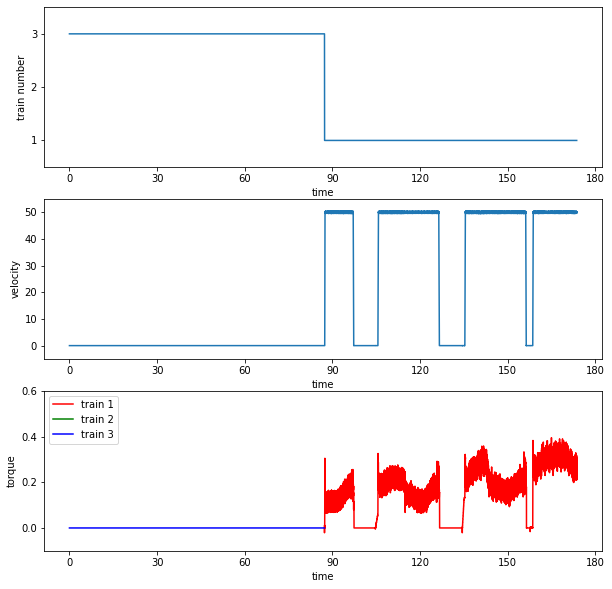

In [3]:
d1 = get_df("d1")
plot_data(d1, "d1")

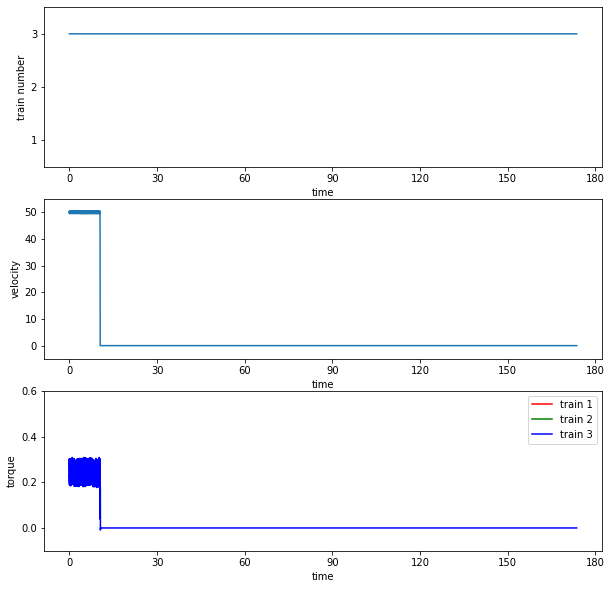

In [4]:
d2 = get_df("d2")
plot_data(d2, "d2")

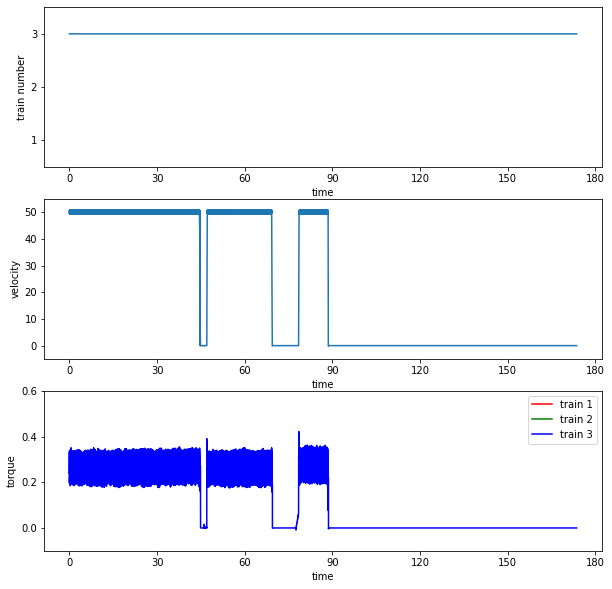

In [5]:
d3 = get_df("d3")
plot_data(d3, "d3")

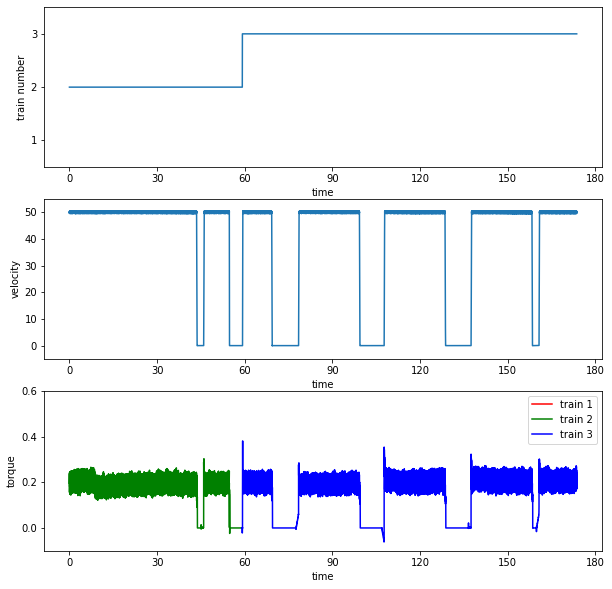

In [6]:
d4 = get_df("d4")
plot_data(d4, "d4")

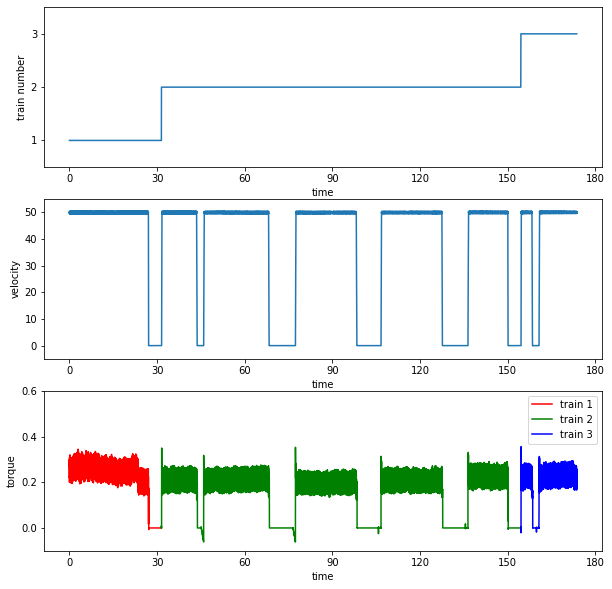

In [7]:
d5 = get_df("d5")
plot_data(d5, "d5")

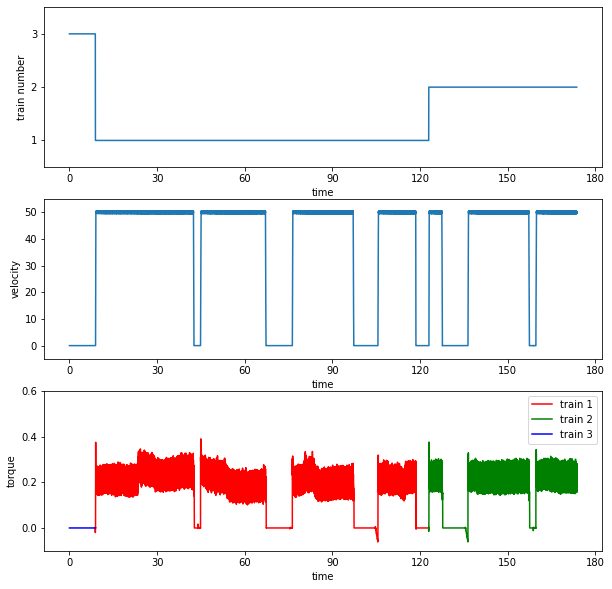

In [8]:
d6 = get_df("d6")
plot_data(d6, "d6")

Text(0.5, 0, 'time')

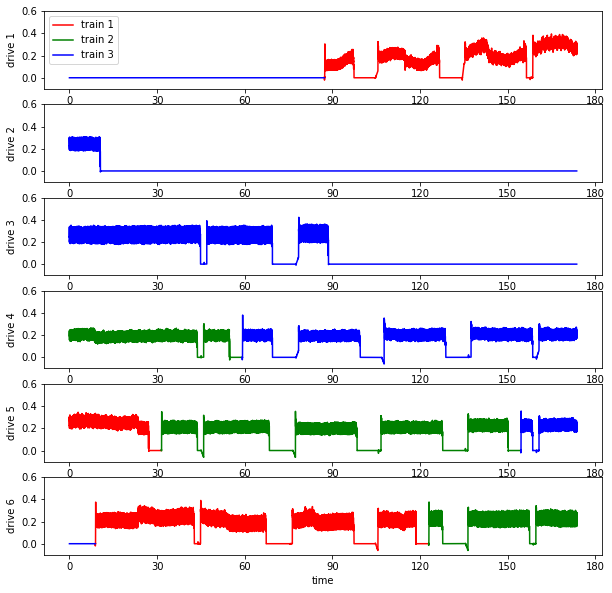

In [72]:
def plot_torque_all_trains(df, drive):
    plt.subplot(6,1,drive)
    plt.plot(df.loc[df['pos']==1, 'time'], df.loc[df['pos']==1, 'tor'], 'r', label='train 1')
    plt.plot(df.loc[df['pos']==2, 'time'], df.loc[df['pos']==2, 'tor'], 'g', label='train 2')
    plt.plot(df.loc[df['pos']==3, 'time'], df.loc[df['pos']==3, 'tor'], 'b', label='train 3')
    plt.xticks(TIME_TICKS)
    plt.ylim(TORQUE_LIM)
    plt.yticks(TORQUE_TICKS)
    plt.ylabel("drive "+str(drive))
    if drive == 1:
        plt.legend(loc='upper left')
    
plt.subplots(6,1,figsize=(10,10))
plot_torque_all_trains(d1, 1)
plot_torque_all_trains(d2, 2)
plot_torque_all_trains(d3, 3)
plot_torque_all_trains(d4, 4)
plot_torque_all_trains(d5, 5)
plot_torque_all_trains(d6, 6)
plt.xlabel("time")



## Plot torque at each train

In [9]:
df = pd.DataFrame({
                  'time':d1['time'], 
                  
                  'd1_pos':d1['pos'], 
                  'd2_pos':d2['pos'], 
                  'd3_pos':d3['pos'], 
                  'd4_pos':d4['pos'], 
                  'd5_pos':d5['pos'], 
                  'd6_pos':d6['pos'], 
                  
                  'd1_vel':d1['vel'], 
                  'd2_vel':d2['vel'], 
                  'd3_vel':d3['vel'], 
                  'd4_vel':d4['vel'], 
                  'd5_vel':d5['vel'], 
                  'd6_vel':d6['vel'], 
                  
                  'd1_tor':d1['tor'], 
                  'd2_tor':d2['tor'], 
                  'd3_tor':d3['tor'], 
                  'd4_tor':d4['tor'], 
                  'd5_tor':d5['tor'], 
                  'd6_tor':d6['tor']
                  })
df.head()


,time,d1_pos,d2_pos,d3_pos,d4_pos,d5_pos,d6_pos,d1_vel,d2_vel,d3_vel,d4_vel,d5_vel,d6_vel,d1_tor,d2_tor,d3_tor,d4_tor,d5_tor,d6_tor
0,0.000000,3,3,3,2,1,3,-0.00002,50.02526,49.74947,49.94469,49.92781,-0.00007,0.0,0.231,0.242,0.196,0.292,0.0
1,0.001734,3,3,3,2,1,3,0.00001,49.87878,49.67910,49.96670,49.96341,0.00000,0.0,0.232,0.242,0.184,0.269,0.0
2,0.003468,3,3,3,2,1,3,0.00002,49.85296,49.66757,49.84562,49.90190,0.00000,0.0,0.258,0.275,0.204,0.301,0.0
3,0.005204,3,3,3,2,1,3,-0.00001,49.65267,49.62158,50.17581,50.15014,0.00004,0.0,0.279,0.289,0.188,0.270,0.0
4,0.006943,3,3,3,2,1,3,0.00000,49.79240,49.92024,50.21992,50.09853,0.00001,0.0,0.304,0.295,0.165,0.282,0.0


### Plot only torque while carrying train1

In [10]:
train1 = df[(df['d1_pos'] == 1) | 
            (df['d2_pos'] == 1) |
            (df['d3_pos'] == 1) | 
            (df['d4_pos'] == 1) | 
            (df['d5_pos'] == 1) | 
            (df['d6_pos'] == 1)]
train1[['d1_pos', 'd2_pos', 'd3_pos', 'd4_pos', 'd5_pos', 'd6_pos']] = train1[['d1_pos', 'd2_pos', 'd3_pos', 'd4_pos', 'd5_pos', 'd6_pos']].replace({2: 0, 3: 0})
train1.head()

,time,d1_pos,d2_pos,d3_pos,d4_pos,d5_pos,d6_pos,d1_vel,d2_vel,d3_vel,d4_vel,d5_vel,d6_vel,d1_tor,d2_tor,d3_tor,d4_tor,d5_tor,d6_tor
0,0.000000,0,0,0,0,1,0,-0.00002,50.02526,49.74947,49.94469,49.92781,-0.00007,0.0,0.231,0.242,0.196,0.292,0.0
1,0.001734,0,0,0,0,1,0,0.00001,49.87878,49.67910,49.96670,49.96341,0.00000,0.0,0.232,0.242,0.184,0.269,0.0
2,0.003468,0,0,0,0,1,0,0.00002,49.85296,49.66757,49.84562,49.90190,0.00000,0.0,0.258,0.275,0.204,0.301,0.0
3,0.005204,0,0,0,0,1,0,-0.00001,49.65267,49.62158,50.17581,50.15014,0.00004,0.0,0.279,0.289,0.188,0.270,0.0
4,0.006943,0,0,0,0,1,0,0.00000,49.79240,49.92024,50.21992,50.09853,0.00001,0.0,0.304,0.295,0.165,0.282,0.0


(0.5, 3.5)

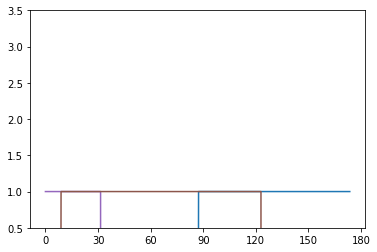

In [13]:
plt.plot(train1.time, train1.d1_pos, label='d1')
plt.plot(train1.time, train1.d2_pos, label='d2')
plt.plot(train1.time, train1.d3_pos, label='d3')
plt.plot(train1.time, train1.d4_pos, label='d4')
plt.plot(train1.time, train1.d5_pos, label='d5')
plt.plot(train1.time, train1.d6_pos, label='d6')
plt.xticks(TIME_TICKS)
plt.ylim(TRAIN_LIM)



In [15]:
def torque_plot_settings():
    plt.ylim(TORQUE_LIM)    
    plt.yticks(TORQUE_TICKS)
    plt.xticks(TIME_TICKS)

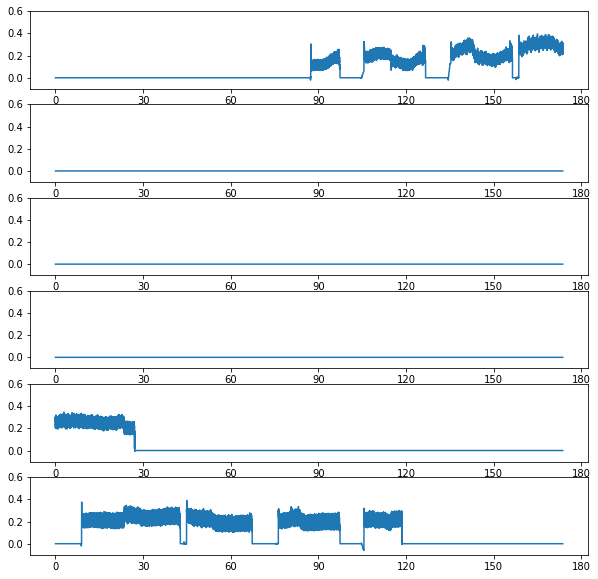

In [17]:
train1.loc[train1['d1_pos']==0, 'd1_tor'] = 0
train1.loc[train1['d2_pos']==0, 'd2_tor'] = 0
train1.loc[train1['d3_pos']==0, 'd3_tor'] = 0
train1.loc[train1['d4_pos']==0, 'd4_tor'] = 0
train1.loc[train1['d5_pos']==0, 'd5_tor'] = 0
train1.loc[train1['d6_pos']==0, 'd6_tor'] = 0

plt.subplots(6,1,figsize=(10,10))

plt.subplot(6,1,1)
plt.plot(train1.time, train1.d1_tor, label='d1')
torque_plot_settings()

plt.subplot(6,1,2)
plt.plot(train1.time, train1.d2_tor, label='d2')
torque_plot_settings()

plt.subplot(6,1,3)
plt.plot(train1.time, train1.d3_tor, label='d3')
torque_plot_settings()

plt.subplot(6,1,4)
plt.plot(train1.time, train1.d4_tor, label='d4')
torque_plot_settings()

plt.subplot(6,1,5)
plt.plot(train1.time, train1.d5_tor, label='d5')
torque_plot_settings()

plt.subplot(6,1,6)
plt.plot(train1.time, train1.d6_tor, label='d6')
torque_plot_settings()


### Plot only torque while carrying train2

In [18]:
train2 = df[(df['d1_pos'] == 2) | 
            (df['d2_pos'] == 2) |
            (df['d3_pos'] == 2) | 
            (df['d4_pos'] == 2) | 
            (df['d5_pos'] == 2) | 
            (df['d6_pos'] == 2)]
train2[['d1_pos', 'd2_pos', 'd3_pos', 'd4_pos', 'd5_pos', 'd6_pos']] = train2[['d1_pos', 'd2_pos', 'd3_pos', 'd4_pos', 'd5_pos', 'd6_pos']].replace({1: 0, 3: 0})
train2.head()

,time,d1_pos,d2_pos,d3_pos,d4_pos,d5_pos,d6_pos,d1_vel,d2_vel,d3_vel,d4_vel,d5_vel,d6_vel,d1_tor,d2_tor,d3_tor,d4_tor,d5_tor,d6_tor
0,0.000000,0,0,0,2,0,0,-0.00002,50.02526,49.74947,49.94469,49.92781,-0.00007,0.0,0.231,0.242,0.196,0.292,0.0
1,0.001734,0,0,0,2,0,0,0.00001,49.87878,49.67910,49.96670,49.96341,0.00000,0.0,0.232,0.242,0.184,0.269,0.0
2,0.003468,0,0,0,2,0,0,0.00002,49.85296,49.66757,49.84562,49.90190,0.00000,0.0,0.258,0.275,0.204,0.301,0.0
3,0.005204,0,0,0,2,0,0,-0.00001,49.65267,49.62158,50.17581,50.15014,0.00004,0.0,0.279,0.289,0.188,0.270,0.0
4,0.006943,0,0,0,2,0,0,0.00000,49.79240,49.92024,50.21992,50.09853,0.00001,0.0,0.304,0.295,0.165,0.282,0.0


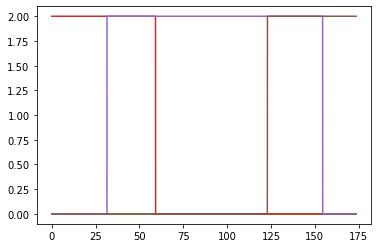

In [19]:
plt.plot(train2.time, train2.d1_pos, label='d1')
plt.plot(train2.time, train2.d2_pos, label='d2')
plt.plot(train2.time, train2.d3_pos, label='d3')
plt.plot(train2.time, train2.d4_pos, label='d4')
plt.plot(train2.time, train2.d5_pos, label='d5')
plt.plot(train2.time, train2.d6_pos, label='d6')


train2.loc[train2['d1_pos']==0, 'd1_tor'] = 0
train2.loc[train2['d2_pos']==0, 'd2_tor'] = 0
train2.loc[train2['d3_pos']==0, 'd3_tor'] = 0
train2.loc[train2['d4_pos']==0, 'd4_tor'] = 0
train2.loc[train2['d5_pos']==0, 'd5_tor'] = 0
train2.loc[train2['d6_pos']==0, 'd6_tor'] = 0


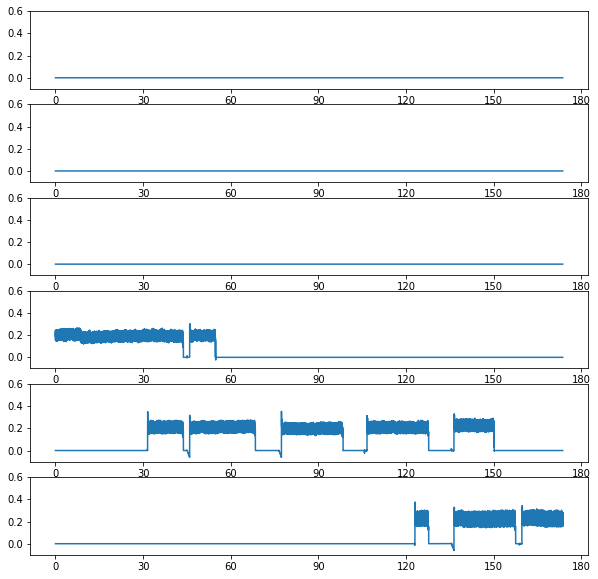

In [20]:
plt.subplots(6,1,figsize=(10,10))

plt.subplot(6,1,1)
plt.plot(train2.time, train2.d1_tor, label='d1')
torque_plot_settings()

plt.subplot(6,1,2)
plt.plot(train2.time, train2.d2_tor, label='d2')
torque_plot_settings()

plt.subplot(6,1,3)
plt.plot(train2.time, train2.d3_tor, label='d3')
torque_plot_settings()

plt.subplot(6,1,4)
plt.plot(train2.time, train2.d4_tor, label='d4')
torque_plot_settings()

plt.subplot(6,1,5)
plt.plot(train2.time, train2.d5_tor, label='d5')
torque_plot_settings()

plt.subplot(6,1,6)
plt.plot(train2.time, train2.d6_tor, label='d6')
torque_plot_settings()

### Plot only torque while carrying train3

In [21]:
train3 = df[(df['d1_pos'] == 3) | 
            (df['d2_pos'] == 3) |
            (df['d3_pos'] == 3) | 
            (df['d4_pos'] == 3) | 
            (df['d5_pos'] == 3) | 
            (df['d6_pos'] == 3)]
train3[['d1_pos', 'd2_pos', 'd3_pos', 'd4_pos', 'd5_pos', 'd6_pos']] = train3[['d1_pos', 'd2_pos', 'd3_pos', 'd4_pos', 'd5_pos', 'd6_pos']].replace({1: 0, 2: 0})
train3.head()

,time,d1_pos,d2_pos,d3_pos,d4_pos,d5_pos,d6_pos,d1_vel,d2_vel,d3_vel,d4_vel,d5_vel,d6_vel,d1_tor,d2_tor,d3_tor,d4_tor,d5_tor,d6_tor
0,0.000000,3,3,3,0,0,3,-0.00002,50.02526,49.74947,49.94469,49.92781,-0.00007,0.0,0.231,0.242,0.196,0.292,0.0
1,0.001734,3,3,3,0,0,3,0.00001,49.87878,49.67910,49.96670,49.96341,0.00000,0.0,0.232,0.242,0.184,0.269,0.0
2,0.003468,3,3,3,0,0,3,0.00002,49.85296,49.66757,49.84562,49.90190,0.00000,0.0,0.258,0.275,0.204,0.301,0.0
3,0.005204,3,3,3,0,0,3,-0.00001,49.65267,49.62158,50.17581,50.15014,0.00004,0.0,0.279,0.289,0.188,0.270,0.0
4,0.006943,3,3,3,0,0,3,0.00000,49.79240,49.92024,50.21992,50.09853,0.00001,0.0,0.304,0.295,0.165,0.282,0.0


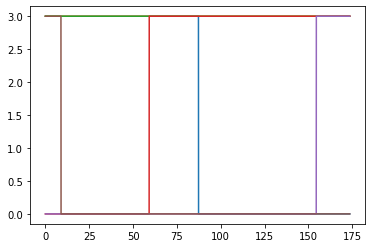

In [22]:
plt.plot(train3.time, train3.d1_pos, label='d1')
plt.plot(train3.time, train3.d2_pos, label='d2')
plt.plot(train3.time, train3.d3_pos, label='d3')
plt.plot(train3.time, train3.d4_pos, label='d4')
plt.plot(train3.time, train3.d5_pos, label='d5')
plt.plot(train3.time, train3.d6_pos, label='d6')


train3.loc[train3['d1_pos']==0, 'd1_tor'] = 0
train3.loc[train3['d2_pos']==0, 'd2_tor'] = 0
train3.loc[train3['d3_pos']==0, 'd3_tor'] = 0
train3.loc[train3['d4_pos']==0, 'd4_tor'] = 0
train3.loc[train3['d5_pos']==0, 'd5_tor'] = 0
train3.loc[train3['d6_pos']==0, 'd6_tor'] = 0

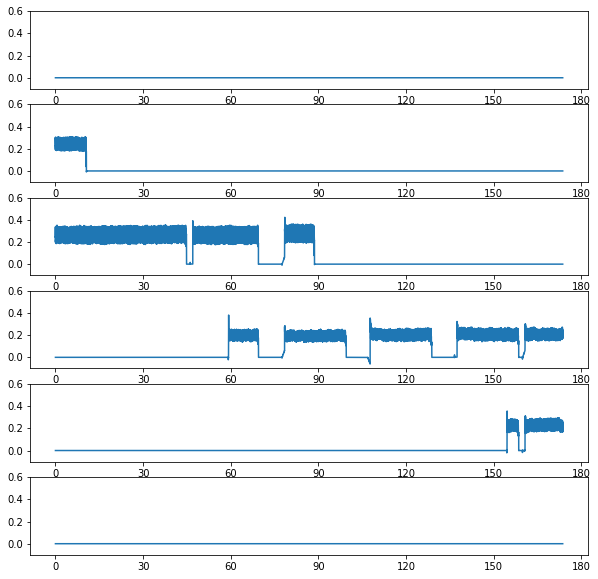

In [23]:
plt.subplots(6,1,figsize=(10,10))

plt.subplot(6,1,1)
plt.plot(train3.time, train3.d1_tor, label='d1')
torque_plot_settings()

plt.subplot(6,1,2)
plt.plot(train3.time, train3.d2_tor, label='d2')
torque_plot_settings()

plt.subplot(6,1,3)
plt.plot(train3.time, train3.d3_tor, label='d3')
torque_plot_settings()

plt.subplot(6,1,4)
plt.plot(train3.time, train3.d4_tor, label='d4')
torque_plot_settings()

plt.subplot(6,1,5)
plt.plot(train3.time, train3.d5_tor, label='d5')
torque_plot_settings()

plt.subplot(6,1,6)
plt.plot(train3.time, train3.d6_tor, label='d6')
torque_plot_settings()

## Build naive bands

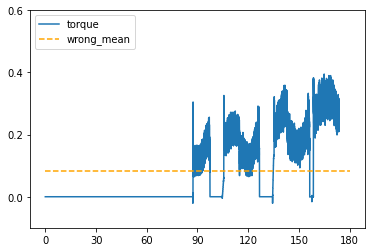

In [34]:
# incorrect mean torque -> use every data point
d1_mean_wrong = d1['tor'].mean()
plt.plot(d1['time'], d1['tor'], label='torque')
plt.plot([0,180], [d1_mean_wrong, d1_mean_wrong], '--', color='orange', label='wrong_mean')
plt.legend(loc="upper left")
torque_plot_settings()


In [ ]:
d1_mean = d1.loc[d1['vel']>40, 'tor'].mean()
d1_sd = d1.loc[d1['vel']>40, 'tor'].std()
const = 2

plt.plot(d1['time'], d1['tor'], label='torque')
plt.plot([0,180], [d1_mean, d1_mean], 'orange', label='mean')
plt.plot([0,180], [d1_mean_wrong, d1_mean_wrong], '--', color='orange', label='wrong_mean')
plt.plot([0,180], [d1_mean+const*d1_sd, d1_mean+const*d1_sd], 'magenta', label='upper_bound')
plt.plot([0,180], [d1_mean-const*d1_sd, d1_mean-const*d1_sd], 'magenta', label='lower_bound')
plt.legend(loc="upper left")
torque_plot_settings()

/var/folders/8f/hytnk3d50f1fgks9vmt2rzfh0000gn/T/ipykernel_11382/3973496377.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calc['rolling_mean'] = df_calc['tor'].rolling(window=window).mean()
/var/folders/8f/hytnk3d50f1fgks9vmt2rzfh0000gn/T/ipykernel_11382/3973496377.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calc['rolling_sd'] = df_calc['tor'].rolling(window=window).std()


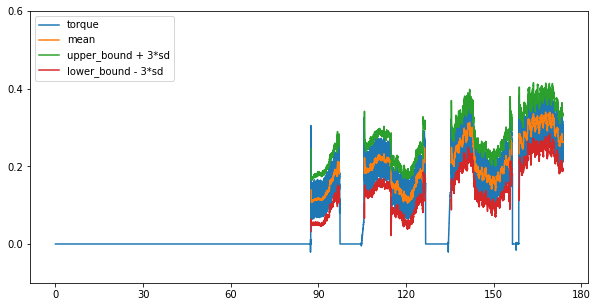

In [66]:
def plot_band(df, const=2, till=180, window=50, mode='naive'):
    plt.figure(figsize=(10,5))
    plt.plot(df['time'], df['tor'], label='torque')
    if mode == 'naive':
        df_mean = df.loc[(df['vel']>40) & (df['time']<=till), 'tor'].mean()
        df_sd = df.loc[(df['vel']>40) & (df['time']<=till), 'tor'].std()

        plt.plot([0,180], [df_mean, df_mean], 'orange', label='mean')
        plt.plot([0,180], [df_mean+const*df_sd, df_mean+const*df_sd], 'magenta', label=f'upper_bound + {const}*sd')
        plt.plot([0,180], [df_mean-const*df_sd, df_mean-const*df_sd], 'magenta', label=f'lower_bound - {const}*sd')
    elif mode == 'bollinger':
        df_calc = df.loc[(df['vel']>40) & (df['time']<=till)]
        idx = df_calc.index
        df_calc['rolling_mean'] = df_calc['tor'].rolling(window=window).mean()
        df_calc['rolling_sd'] = df_calc['tor'].rolling(window=window).std()
        
        df.loc[idx, 'mean'] = df_calc['rolling_mean']
        df.loc[idx, 'upper_bound'] = df_calc['rolling_mean'] + const*df_calc['rolling_sd']
        df.loc[idx, 'lower_bound'] = df_calc['rolling_mean'] - const*df_calc['rolling_sd']
        
        plt.plot(df['time'], df['mean'], label='mean')
        plt.plot(df['time'], df['upper_bound'], label=f'upper_bound + {const}*sd')
        plt.plot(df['time'], df['lower_bound'], label=f'lower_bound - {const}*sd')
        
    plt.legend(loc="upper left")
    torque_plot_settings()
plot_band(d1, mode='bollinger', const=3, till=180, window=50)

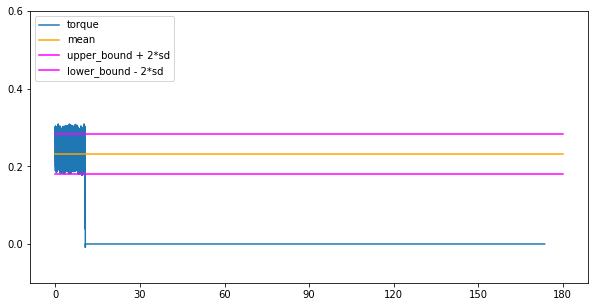

In [41]:
plot_band(d2)

/var/folders/8f/hytnk3d50f1fgks9vmt2rzfh0000gn/T/ipykernel_11382/2056877750.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calc['rolling_mean'] = df_calc['tor'].rolling(window=window).mean()
/var/folders/8f/hytnk3d50f1fgks9vmt2rzfh0000gn/T/ipykernel_11382/2056877750.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calc['rolling_sd'] = df_calc['tor'].rolling(window=window).std()


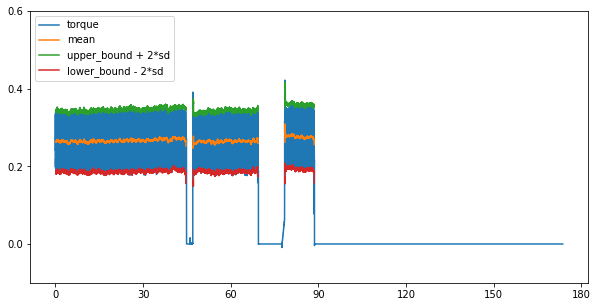

In [61]:
plot_band(d3, mode='bollinger')

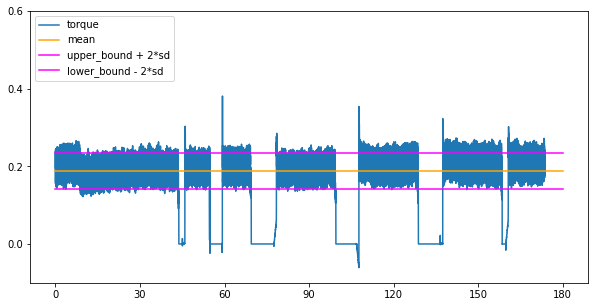

In [43]:
plot_band(d4)

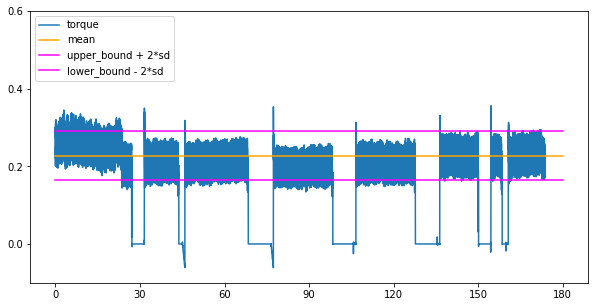

In [44]:
plot_band(d5)

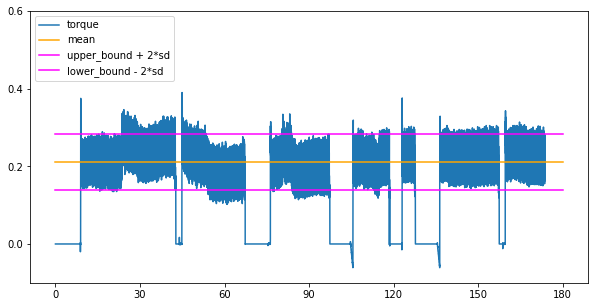

In [45]:
plot_band(d6)

# Create fake failed data

Text(0.5, 0, 'time')

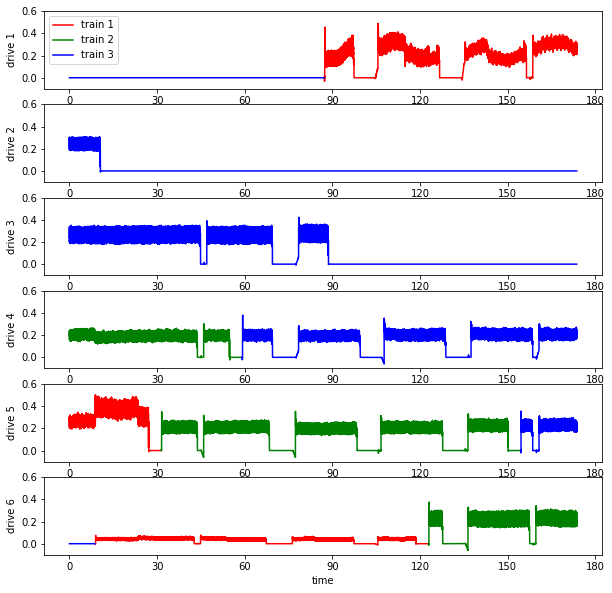

In [94]:
## fail at train1
fail1_d1 = d1.copy()
fail1_d2 = d2.copy()
fail1_d3 = d3.copy()
fail1_d4 = d4.copy()
fail1_d5 = d5.copy()
fail1_d6 = d6.copy()
inc_factor = 1.5
dec_factor = 0.2
# drive 1 inc
# drive 5 inc
# drive 6 dec
fail1_d1.loc[(fail1_d1['pos']==1) & (fail1_d6['pos']==1), 'tor'] = fail1_d1['tor'] * inc_factor
fail1_d5.loc[(fail1_d5['pos']==1) & (fail1_d6['pos']==1), 'tor'] = fail1_d5['tor'] * inc_factor
fail1_d6.loc[fail1_d6['pos']==1, 'tor'] = fail1_d6['tor'] * dec_factor
## plot
plt.subplots(6,1,figsize=(10,10))
plot_torque_all_trains(fail1_d1, 1)
plot_torque_all_trains(fail1_d2, 2)
plot_torque_all_trains(fail1_d3, 3)
plot_torque_all_trains(fail1_d4, 4)
plot_torque_all_trains(fail1_d5, 5)
plot_torque_all_trains(fail1_d6, 6)
plt.xlabel("time")

Text(0.5, 0, 'time')

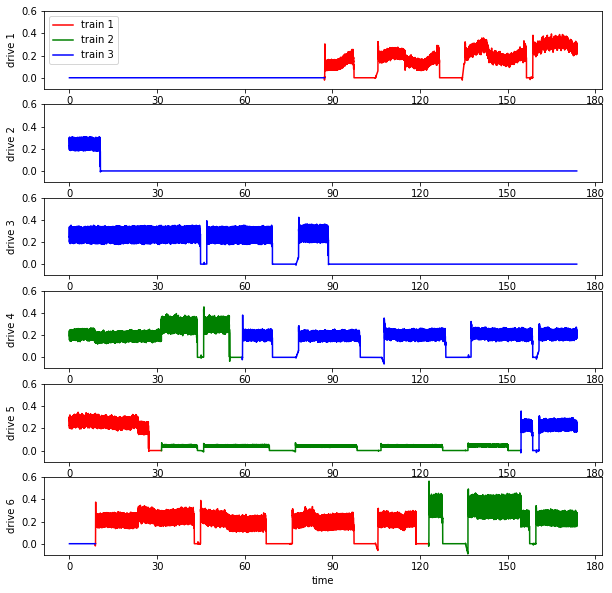

In [95]:
## fail at train2
fail2_d1 = d1.copy()
fail2_d2 = d2.copy()
fail2_d3 = d3.copy()
fail2_d4 = d4.copy()
fail2_d5 = d5.copy()
fail2_d6 = d6.copy()
inc_factor = 1.5
dec_factor = 0.2
# drive 4 inc
# drive 6 inc
# drive 5 dec
fail2_d4.loc[(fail2_d4['pos']==2) & (fail2_d5['pos']==2), 'tor'] = fail2_d4['tor'] * inc_factor
fail2_d6.loc[(fail2_d6['pos']==2) & (fail2_d5['pos']==2), 'tor'] = fail2_d6['tor'] * inc_factor
fail2_d5.loc[fail2_d5['pos']==2, 'tor'] = fail2_d5['tor'] * dec_factor
## plot
plt.subplots(6,1,figsize=(10,10))
plot_torque_all_trains(fail2_d1, 1)
plot_torque_all_trains(fail2_d2, 2)
plot_torque_all_trains(fail2_d3, 3)
plot_torque_all_trains(fail2_d4, 4)
plot_torque_all_trains(fail2_d5, 5)
plot_torque_all_trains(fail2_d6, 6)
plt.xlabel("time")

Text(0.5, 0, 'time')

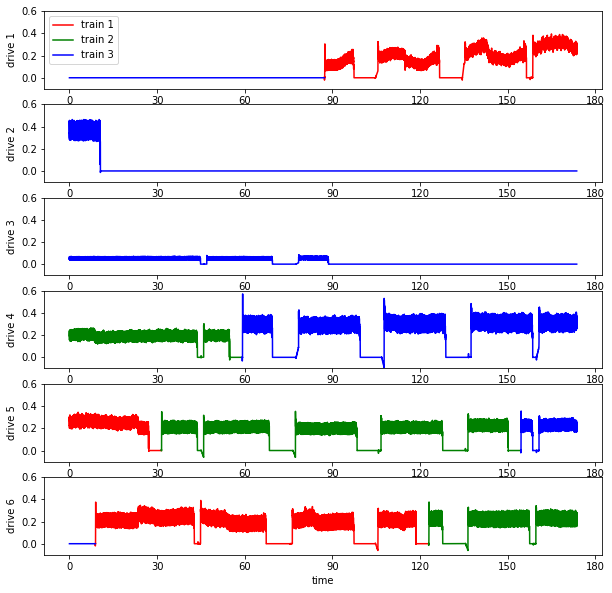

In [96]:
## fail at train3
fail3_d1 = d1.copy()
fail3_d2 = d2.copy()
fail3_d3 = d3.copy()
fail3_d4 = d4.copy()
fail3_d5 = d5.copy()
fail3_d6 = d6.copy()
inc_factor = 1.5
dec_factor = 0.2
# drive 2 inc
# drive 4 inc
# drive 3 dec
fail3_d2.loc[(fail3_d2['pos']==3) & (fail3_d3['pos']==3), 'tor'] = fail3_d2['tor'] * inc_factor
fail3_d4.loc[(fail3_d4['pos']==3) & (fail3_d3['pos']==3), 'tor'] = fail3_d4['tor'] * inc_factor
fail3_d3.loc[fail3_d3['pos']==3, 'tor'] = fail3_d3['tor'] * dec_factor
## plot
plt.subplots(6,1,figsize=(10,10))
plot_torque_all_trains(fail3_d1, 1)
plot_torque_all_trains(fail3_d2, 2)
plot_torque_all_trains(fail3_d3, 3)
plot_torque_all_trains(fail3_d4, 4)
plot_torque_all_trains(fail3_d5, 5)
plot_torque_all_trains(fail3_d6, 6)
plt.xlabel("time")

## Slice torque curves by finding rising edge 

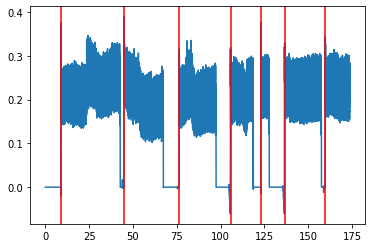

In [65]:
ddd = d6.loc[(d6['vel']>40) & (d6['vel'].shift(1)<40)]
plt.plot(d6['time'], d6['tor'], label='torque')
for xc in ddd.time:
    plt.axvline(x=xc, color='red')

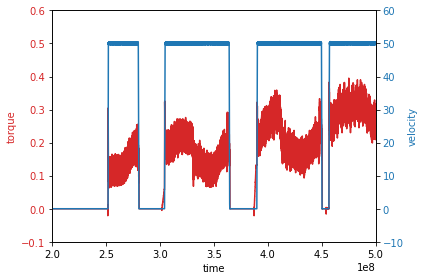

In [78]:
def zoom_torque_plot(df, xlim):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('time')
    ax1.set_ylabel('torque', color=color)
    ax1.plot(df['time'], df['tor'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xlim(xlim)
    ax1.set_ylim(TORQUE_LIM)


    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('velocity', color=color)  # we already handled the x-label with ax1
    ax2.plot(df['time'], df['vel'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim([-10, 60])

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

zoom_torque_plot(d1, [2e8, 5e8])

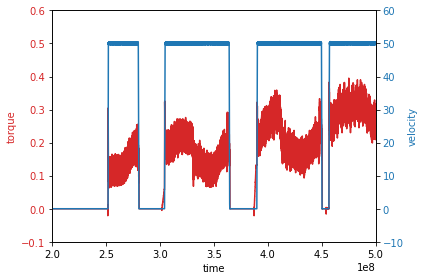

In [79]:
zoom_torque_plot(d1, [2e8, 5e8])

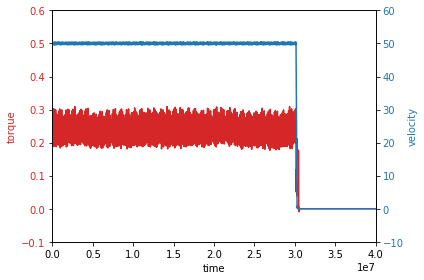

In [82]:
zoom_torque_plot(d2, [0, 0.4e8])

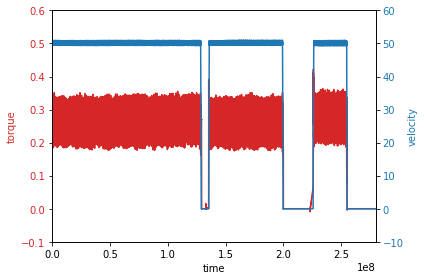

In [84]:
zoom_torque_plot(d3, [0, 2.8e8])

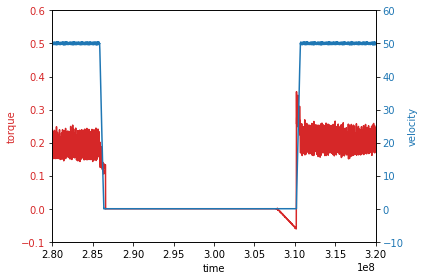

In [92]:
zoom_torque_plot(d4, [2.8e8, 3.2e8])